<a href="https://colab.research.google.com/github/MaxDangVu136/ml_carpentry_workshop_2023/blob/main/ml_carpentry_workshop_day2_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ensemble method: whole method greater than the sum of its parts.
The individual models may have weak predictive performance, but combining them improves the performance to a point that exceeds any model by itself (think how we take multiple opinions on a subject before making final decision).
Ensemble method has highly sensitive individual components to outliers (i.e. decision tree, regression), combining components smooths this out.

Three main ensemble methods:
- Stacking -> same dataset, different models, trained in parallel
- Bagging -> different subsets of dataset, same models, trained in parallel
- Boosting -> subset of bad estimates from dataset, same models, trained in series.

Example: Use bagging (random forest) for a classification problem

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Load in a dataset
penguins = sns.load_dataset('penguins')

# Prepare and define data and targeted features
feature_names = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [3]:
# Remove nan values
penguins.dropna(subset=feature_names, inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [4]:
# Look for all unique penguin species in dataset
species_names = penguins['species'].unique()

# Features data of interest
X = penguins[feature_names]

# Data labels for training
y = penguins.species

X, y

(     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
 0              39.1           18.7              181.0       3750.0
 1              39.5           17.4              186.0       3800.0
 2              40.3           18.0              195.0       3250.0
 4              36.7           19.3              193.0       3450.0
 5              39.3           20.6              190.0       3650.0
 ..              ...            ...                ...          ...
 338            47.2           13.7              214.0       4925.0
 340            46.8           14.3              215.0       4850.0
 341            50.4           15.7              222.0       5750.0
 342            45.2           14.8              212.0       5200.0
 343            49.9           16.1              213.0       5400.0
 
 [342 rows x 4 columns],
 0      Adelie
 1      Adelie
 2      Adelie
 4      Adelie
 5      Adelie
         ...  
 338    Gentoo
 340    Gentoo
 341    Gentoo
 342    Gentoo
 343   

In [5]:
# Split data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('training size:', X_train.shape)
print('testing size: ', X_test.shape)

training size: (273, 4)
testing size:  (69, 4)


Train and test subsets: ratio depends on what you want/need (typically 10-20%). Every sample in testing takes away from training. Random shuffling approaches will help with that (e.g. K-folds).

Validation sets are useful during model training. You do not want to train or refine your model learning process with the test set as it would invalidate the model and the process.

Usually the test-set is hidden in competitions to prevent this exact issue.

Furthermore, validation sets helps the model and you as a data scientist to observe model convergence over time

In [6]:
from sklearn.tree import DecisionTreeClassifier

# define model
tree = DecisionTreeClassifier()

# train model
tree.fit(X_train, y_train)

# test model
tree.predict(X_test)
print(tree.score(X_test, y_test))   # Don't trust models with a score above 98% (most likely overfitting)

0.9420289855072463


<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

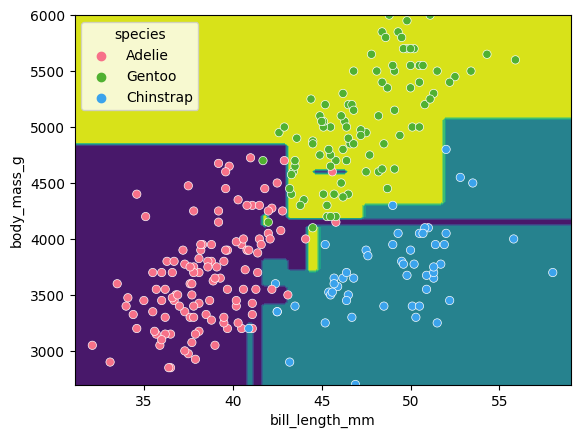

In [7]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

# define two features to visualise
f1 = feature_names[0]
f2 = feature_names[3]

# redefine
tree_2d = DecisionTreeClassifier()
tree_2d.fit(X_train[[f1, f2]], y_train)

d = DecisionBoundaryDisplay.from_estimator(tree_2d, X_train[[f1, f2]])

sns.scatterplot(X_train, x=f1, y=f2, hue=y_train, palette="husl")

Train with one decision tree leads to overfitting. Random forests takes a lot of decision trees at once, then finds the average.

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Defining our model
forest = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=1)

# Train our model
forest.fit(X_train, y_train)

# Compare our models
print(tree.score(X_test, y_test))
print(forest.score(X_test, y_test))

0.9420289855072463
0.9855072463768116


Reducing n_estimators does improve training time. Do we need 100 models? It does increase acc and overfit.